## Preprocesamiento

In [ ]:
!pip install plotly

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
#pd.options.plotting.backend = "plotly"

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
np.__version__

'1.19.5'

In [ ]:
seaborn.__version__

'0.11.1'

### Obtención de dataset de terremotos

In [ ]:
earthquakes = pd.read_csv('earthquakes-2021-01-19_21-44-08_-0500.tsv', sep = '\t')
earthquakes.shape

(6217, 39)

In [ ]:
earthquakes.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,35.5,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,35.8,NaN,NaN,10.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,58.2,18.0,7.1,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [ ]:
earthquakes.columns

Index(['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)',
       'Mag', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

Limpieza y preprocesamiento de datos

In [ ]:
earthquakes = earthquakes[earthquakes['Search Parameters'].isnull()]
earthquakes = earthquakes.drop('Search Parameters', axis = 1)
earthquakes.isnull().sum()


Year                                     0
Mo                                     408
Dy                                     562
Hr                                    2043
Mn                                    2247
Sec                                   1848
Tsu                                   4345
Vol                                   6148
Location Name                            1
Latitude                                48
Longitude                               48
Focal Depth (km)                      2964
Mag                                   1790
MMI Int                               3362
Deaths                                4143
Death Description                     3660
Missing                               6195
Missing Description                   6195
Injuries                              4967
Injuries Description                  4779
Damage ($Mil)                         5704
Damage Description                    1759
Houses Destroyed                      5428
Houses Dest

In [ ]:
earthquakes['Decade'] = (earthquakes['Year'] / 10).astype('int')
earthquakes['Century'] = (earthquakes['Year'] // 100).astype('int') + 1

In [ ]:
earthquakes['Country'] = earthquakes['Location Name'].str.split(':', expand = True)[0]

###Delimitando dataframe a >= Siglo 20

In [ ]:
earthquake_21 = earthquakes.query('Century >= 20')


In [ ]:
earthquake_21.columns

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Location Name',
       'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'MMI Int', 'Deaths',
       'Death Description', 'Missing', 'Missing Description', 'Injuries',
       'Injuries Description', 'Damage ($Mil)', 'Damage Description',
       'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description', 'Decade', 'Century', 'Country'],
      dtype='object')

#Análisis Exploratorio

##Análisis entre terremotos y otros fenómenos

Revisión de Tsunamis y Erupciones asociadas a terremotos

In [ ]:
tsu = earthquake_21[earthquake_21['Tsu'].notnull()]
vol = earthquake_21[earthquake_21['Vol'].notnull()]

In [ ]:
tsu.shape

(1043, 41)

In [ ]:
vol.shape

(27, 41)

Preparando dataframes de comparación

In [ ]:
comparation_tsu = earthquake_21.get(['Year', 'Mag']).groupby('Year').mean()
comparation_tsu['tsu'] = tsu.get(['Year', 'Mag']).groupby('Year').mean()
comparation_tsu['count'] = tsu.get(['Year', 'Mag']).groupby('Year').count()

In [ ]:
comparation_tsu.head()

,Mag,tsu,count
Year,,,
1900.0,7.430769,7.125,4.0
1901.0,7.131250,7.400,9.0
1902.0,7.155556,6.940,5.0
1903.0,7.226667,6.500,2.0
1904.0,7.417647,7.800,5.0


In [ ]:
comparation_tsu.shape

(122, 3)

Gráfico en matplotlib

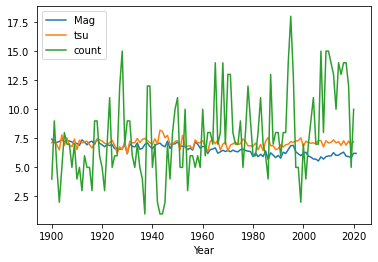

In [ ]:
comparation_tsu[1900:].plot(kind = 'line')

**Gráfico en Plotly**

In [ ]:
import plotly.express as px
comparation_tsu['year'] = comparation_tsu.index

fig = px.line(comparation_tsu, x='year', y="Mag",title="Relación entre intensidad de terremotos e intensidad de terremotos con tsunamis a lo largo del tiempo ")
fig.add_scatter(x=comparation_tsu['year'], y=comparation_tsu['tsu'],
                mode='lines',name="tsu")

fig.show()

Exportación de Dataframe a CSV

In [ ]:
comparation_tsu.to_csv('df_magnitud_terremotos_vs_tsunami.csv', encoding='utf-8', index=False)

**  INTENSIDAD TERREMOTOS vs TERREMOTOS EN LA QUE HAYA UNA ERUPCIÓN ASOCIADA **

In [ ]:
comparation_vol = earthquake_21.get(['Year', 'Mag']).groupby('Year').mean()
comparation_vol['vol'] = vol.get(['Year', 'Mag']).groupby('Year').mean()
comparation_vol['count'] = vol.get(['Year', 'Mag']).groupby('Year').count()

In [ ]:
comparation_vol['vol'] = comparation_vol['vol'].replace(np.nan, 0)
comparation_vol['count'] = comparation_vol['count'].replace(np.nan, 0)

In [ ]:
comparation_vol.tail(12)

,Mag,vol,count
Year,,,
2010.0,5.990323,4.400000,1.0
2011.0,5.986667,0.000000,0.0
2012.0,6.269388,0.000000,0.0
2013.0,6.030189,0.000000,0.0
2014.0,6.050909,0.000000,0.0
2015.0,6.204167,0.000000,0.0
2016.0,6.313462,0.000000,0.0
2017.0,5.964063,0.000000,0.0
2018.0,5.929231,5.866667,3.0


In [ ]:
comparation_vol.shape

(122, 3)

In [ ]:
comparation_vol.head()

,Mag,vol,count
Year,,,
1900.0,7.430769,0.0,0.0
1901.0,7.131250,7.9,1.0
1902.0,7.155556,0.0,0.0
1903.0,7.226667,0.0,0.0
1904.0,7.417647,0.0,0.0


In [ ]:
vol.Mag.count()

22

In [ ]:
comparation_vol[1900:].shape

(122, 3)

Gráfico en matplotlib

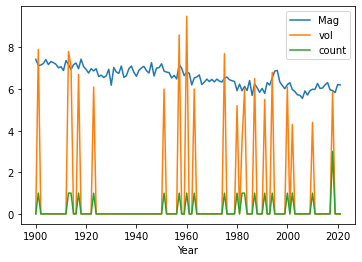

In [ ]:
comparation_vol[1900:].plot(kind = 'line')

Gráfico en Plotly

In [ ]:
import plotly.express as px
comparation_vol['year'] = comparation_vol.index

fig = px.line(comparation_vol, x='year', y="Mag", title="Relación entre intensidad de terremotos e intensidad de terremotos con erupciones volcanicas a lo largo del tiempo ")
fig.add_scatter(x=comparation_vol['year'], y=comparation_vol['vol'],
                mode='lines',name="vol")

fig.show()

Exportación de Dataframe a CSV

In [ ]:
comparation_vol.to_csv('df_magnitud_terremotos_vs_terremoto_volcanes.csv', encoding='utf-8', index=False)

In [ ]:
no_tsu_no_vo = earthquake_21[(earthquake_21['Tsu'].isnull()) & (earthquake_21['Vol'].isnull()) ]


In [ ]:
no_tsu_no_vo.shape

(2688, 41)

In [ ]:
tsu.shape

(1043, 41)

In [ ]:
vol.shape

(27, 41)

##**Relación entre terremotos vs terremotos sin otros fenómenos**


In [ ]:
comparation_no_vol_no_ = earthquake_21.get(['Year', 'Mag']).groupby('Year').mean()
comparation_no_vol_no_['no_vol_no_tsu'] = no_tsu_no_vo.get(['Year', 'Mag']).groupby('Year').mean()

In [ ]:
comparation_no_vol_no_

,Mag,no_vol_no_tsu
Year,,
1900.0,7.430769,7.566667
1901.0,7.131250,6.785714
1902.0,7.155556,7.238462
1903.0,7.226667,7.338462
1904.0,7.417647,7.258333
...,...,...
2017.0,5.964063,5.698000
2018.0,5.929231,5.637255
2019.0,5.829508,5.730357


Gráfico matplotlib

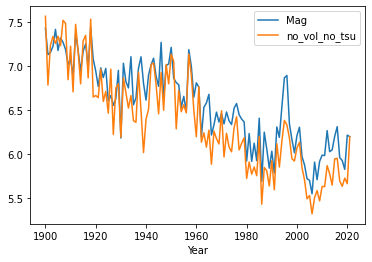

In [ ]:
comparation_no_vol_no_[1900:].plot(kind = 'line')

Gráfico plotly

In [ ]:
import plotly.express as px
comparation_no_vol_no_['year'] = comparation_no_vol_no_.index

fig = px.line(comparation_no_vol_no_, x='year', y="Mag",title="Relación entre intensidad de terremotos e intensidad de terremotos sin otros fenómenos a lo largo del tiempo ")
fig.add_scatter(x=comparation_no_vol_no_['year'], y=comparation_no_vol_no_['no_vol_no_tsu'],
                mode='lines',name="no_vol_no_")

fig.show()


Exportación de Dataframe a CSV

In [ ]:
comparation_no_vol_no_.to_csv('df_magnitud_terremotos_vs_terremoto_sin_fenomenos.csv', encoding='utf-8', index=False)

##**Comparación Cantidad de terremotos x Año vs Terremotos asociados a tsunamis + erupciones volcánicas**

In [ ]:
comparation_general = earthquake_21.get(['Year', 'Mag']).groupby('Year').mean()
comparation_general['count'] = earthquake_21.get(['Year', 'Mag']).groupby('Year').count()


In [ ]:
comparation_general.columns

Index(['Mag', 'count'], dtype='object')

In [ ]:
comparation_general['count'] 

Year
1900.0    13
1901.0    16
1902.0    18
1903.0    15
1904.0    17
          ..
2017.0    64
2018.0    65
2019.0    61
2020.0    28
2021.0     1
Name: count, Length: 122, dtype: int64

In [ ]:
comparation_general.head()

,Mag,count
Year,,
1900.0,7.430769,13
1901.0,7.131250,16
1902.0,7.155556,18
1903.0,7.226667,15
1904.0,7.417647,17


In [ ]:
comparation_tsu['count'] = comparation_tsu['count'].replace(np.nan, 0)
comparation_tsu['count']


Year
1900.0     4.0
1901.0     9.0
1902.0     5.0
1903.0     2.0
1904.0     5.0
          ... 
2017.0    14.0
2018.0    12.0
2019.0     5.0
2020.0    10.0
2021.0     0.0
Name: count, Length: 122, dtype: float64

In [ ]:
comparation_vol['count']

Year
1900.0    0.0
1901.0    1.0
1902.0    0.0
1903.0    0.0
1904.0    0.0
         ... 
2017.0    0.0
2018.0    3.0
2019.0    0.0
2020.0    0.0
2021.0    0.0
Name: count, Length: 122, dtype: float64

In [ ]:
years = [int(x) for x in comparation_general.index.tolist()]

In [ ]:
concatenated = pd.concat([pd.Series(years), comparation_general['count'], comparation_tsu['count'],
                           comparation_vol['count']],keys=['Year','Total Earthquakes', 'Total Earthquakes with Tsunami',
                                                           'Total Earthquakes with Volcanic Eruption'])


In [ ]:
concatenated.head()

      Year
Year  0.0     1900.0
      1.0     1901.0
      2.0     1902.0
      3.0     1903.0
      4.0     1904.0
dtype: float64

GRÁFICO EN PLOTLY TERREMOTOS VS TSUNAMIS

In [ ]:
import plotly.express as px
fig = px.line( x=years, y=comparation_general['count'], title='Terremotos vs Tsunamis')
fig.add_scatter(x=years, y=comparation_tsu['count'], mode='lines',name="tsunami")
fig.show()


GRÁFICO PLOTLY VS ERUPCIONES VOLCÁNICAS

In [ ]:
import plotly.express as px
fig = px.line( x=years, y=comparation_general['count'], title='Terremotos vs Erupciones Volcánicas')
fig.add_scatter(x=years, y=comparation_vol['count'], mode='lines', name="eruption")
fig.show()


Exportación de Dataframes a CSV

In [ ]:
comparation_general.to_csv('df_comparacion_terremoto_general.csv', encoding='utf-8', index=False)
comparation_vol.to_csv('df_comparacion_erupciones.csv', encoding='utf-8', index=False)
comparation_tsu.to_csv('df_comparacion_tsunami.csv', encoding='utf-8', index=False)

##**Análisis de magnitudes de terremotos**

**Generación de dataframe para exportarlo en formato CSV (animación de terremotos por magnitud)**

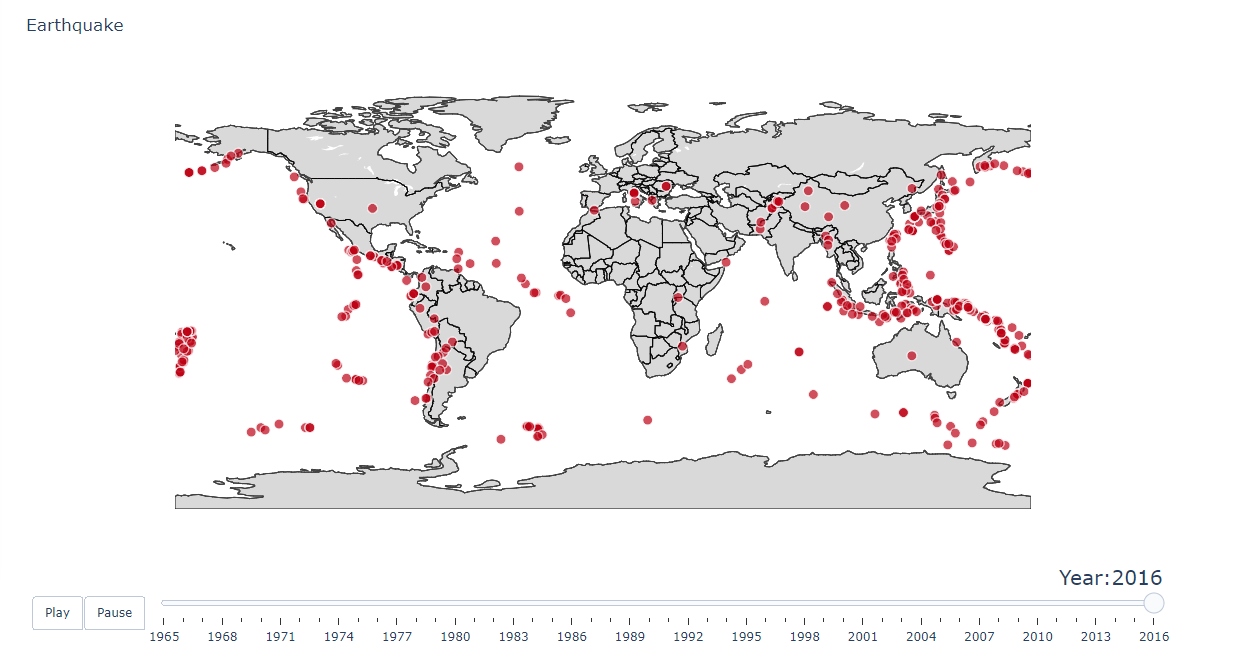

In [ ]:
earthquake_animation_df = earthquake_21.copy()
earthquake_animation_df['Label Name'] =  earthquake_animation_df[['Mag','Location Name']].apply(lambda x : ' Magnitude: {} \n  Location: {}'.format(x[0],x[1]), axis=1)
#"Magnitude: " +  earthquake_animation_df["Mag"] # + " Date:" # +  earthquake_animation_df["Dy"].astype(str) + earthquake_animation_df["Mo"].astype(str)
earthquake_animation_df.to_csv('earthquake_mag_animation.csv', encoding='utf-8', index=False)


In [ ]:
earthquake_animation_df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Label Name
2476,1900.0,1.0,10.0,NaN,NaN,NaN,5459.0,NaN,INDONESIA: GALELA (HALMAHERA ISLAND),-0.03,127.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,INDONESIA,Magnitude: nan \n Location: INDONESIA: GALE...
2477,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,36.50,133.50,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,JAPAN,Magnitude: 7.8 \n Location: JAPAN: SEA OF J...
2478,1900.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,INDONESIA: JAVA: SUKABUMI,-6.84,106.96,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,190,20,INDONESIA,Magnitude: nan \n Location: INDONESIA: JAVA...
2479,1900.0,1.0,20.0,6.0,33.0,30.0,NaN,NaN,MEXICO,20.00,-105.00,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,190,20,MEXICO,Magnitude: 7.4 \n Location: MEXICO
2480,1900.0,5.0,16.0,20.0,12.0,0.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.00,-105.00,60.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,MEXICO,Magnitude: 7.8 \n Location: MEXICO: NEAR CO...


PROCESAMIENTO A NUEVO DATAFRAME

In [ ]:

earthquake_no_nan_mag = earthquake_21[earthquake_21.Mag.notnull()]
earthquake_no_nan_mag.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country
2477,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,36.5,133.5,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,JAPAN
2479,1900.0,1.0,20.0,6.0,33.0,30.0,NaN,NaN,MEXICO,20.0,-105.0,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,190,20,MEXICO
2480,1900.0,5.0,16.0,20.0,12.0,0.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.0,-105.0,60.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,MEXICO
2482,1900.0,6.0,21.0,20.0,52.0,NaN,NaN,NaN,COSTA RICA,10.0,-85.5,60.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,COSTA RICA
2483,1900.0,7.0,12.0,6.0,25.0,0.0,NaN,NaN,"TURKEY: KARS,KARAKURT,KAGIZMAN,DIGOR",40.3,43.1,NaN,5.9,8.0,140.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,20,TURKEY


In [ ]:
earthquake_no_nan_mag['Mag Int'] = earthquake_no_nan_mag['Mag'].astype('int32')

In [ ]:
earthquake_no_nan_mag['Decade'] = earthquake_no_nan_mag['Decade'].apply(lambda x: x*10)

GENERACIÓN DE CSV

In [ ]:
earthquake_no_nan_mag.to_csv('df_with_magnitude_no_nan.csv', encoding='utf-8', index=False)

DATAFRAME COPIA

In [ ]:
earthquake_2 = earthquake_no_nan_mag.copy()
earthquake_2['Decade Count'] =  earthquake_no_nan_mag.groupby('Decade')['Year'].count()


In [ ]:
earthquake_2.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int,Decade Count
2477,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,36.5,133.5,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,JAPAN,7,NaN
2479,1900.0,1.0,20.0,6.0,33.0,30.0,NaN,NaN,MEXICO,20.0,-105.0,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900,20,MEXICO,7,NaN
2480,1900.0,5.0,16.0,20.0,12.0,0.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.0,-105.0,60.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,MEXICO,7,NaN
2482,1900.0,6.0,21.0,20.0,52.0,NaN,NaN,NaN,COSTA RICA,10.0,-85.5,60.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,COSTA RICA,7,NaN
2483,1900.0,7.0,12.0,6.0,25.0,0.0,NaN,NaN,"TURKEY: KARS,KARAKURT,KAGIZMAN,DIGOR",40.3,43.1,NaN,5.9,8.0,140.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,TURKEY,5,NaN


In [ ]:
 earthquake_gb = earthquake_2.groupby(['Mag Int','Decade'])['Year'].count().reset_index(name="count")

GRÁFICO DE MAGNITUD VS DECADA

In [ ]:
import plotly.express as px
fig = px.bar(earthquake_gb, x="Decade", y="count",color="Mag Int")
fig.show()

Exportación de Dataframe a CSV

In [ ]:
earthquake_gb.to_csv('df_magnitude_decade.csv', encoding='utf-8', index=False)

GRÁFICO MAGNITUD VS PROFUNDIDAD

In [ ]:
earthquake_no_nan_mag_depth = earthquake_21[(earthquake_21.Mag.notnull()) & (earthquake_21['Focal Depth (km)'].notnull())]
earthquake_no_nan_mag_depth['Label Name'] =  earthquake_no_nan_mag_depth[['Year','Location Name']].apply(lambda x : 'Year: {} \n  Location: {}'.format(int(x[0]),x[1]), axis=1)



In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure(data=go.Scatter(x=earthquake_no_nan_mag_depth['Focal Depth (km)'],
                                y=earthquake_no_nan_mag_depth['Mag'],
                                mode='markers',
                                marker_color=earthquake_no_nan_mag_depth['Mag'],
                                text=earthquake_no_nan_mag_depth['Label Name'],
                                      )) # hover text goes here

fig.show()

Exportación de Dataframe a CSV

In [ ]:
earthquake_no_nan_mag_depth.to_csv('df_magnitude_depth.csv', encoding='utf-8', index=False)

Bubble Chart - Magnitud (Mayor a 7 ) a lo largo de los años 

In [ ]:
import plotly.express as px

earthquake_major = earthquake_no_nan_mag.query('Mag > 7')
fig = px.scatter(earthquake_major, x="Year", y="Mag",
	        size='Mag' , color="Mag", hover_name="Location Name", log_x=True, size_max=7)
fig.show()

In [ ]:
earthquake_no_nan_mag_depth.groupby(['Mag','Year']).max()

Mo  ...                                         Label Name
Mag Year          ...                                                   
1.6 2007.0   8.0  ...                      Year: 2007 \n  Location: UTAH
2.1 2013.0   4.0  ...              Year: 2013 \n  Location: TEXAS:  WEST
2.2 2004.0   1.0  ...  Year: 2004 \n  Location: SLOVAKIA:  SLOVENSKO ...
3.1 2009.0   9.0  ...    Year: 2009 \n  Location: AUSTRALIA:  MORNINGTON
    2011.0   2.0  ...         Year: 2011 \n  Location: COLORADO:  PAONIA
...          ...  ...                                                ...
9.0 1952.0  11.0  ...  Year: 1952 \n  Location: RUSSIA:  KAMCHATKA PE...
9.1 2004.0  12.0  ...  Year: 2004 \n  Location: INDONESIA:  SUMATRA: ...
    2011.0   3.0  ...            Year: 2011 \n  Location: JAPAN:  HONSHU
9.2 1964.0   3.0  ...                    Year: 1964 \n  Location: ALASKA
9.5 1960.0   5.0  ...  Year: 1960 \n  Location: CHILE:  PUERTO MONTT,...

[1871 rows x 40 columns]

TERREMOTO DE MAYOR MAGNITUD X AÑO

In [ ]:
earthquake_max_year = earthquake_no_nan_mag_depth.loc[earthquake_no_nan_mag_depth.groupby("Year")["Mag"].idxmax()]

In [ ]:
earthquake_max_year[earthquake_max_year.Year == 1960]

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Label Name
3796,1960.0,5.0,22.0,19.0,11.0,17.0,1902.0,4153.0,"CHILE: PUERTO MONTT, VALDIVIA",-38.143,-73.407,33.0,9.5,12.0,2000.0,4.0,NaN,NaN,3000.0,4.0,1000.0,4.0,58622.0,4.0,NaN,NaN,2226.0,4.0,NaN,NaN,3000.0,4.0,1000.0,4.0,58622.0,4.0,NaN,NaN,196,20,CHILE,"Year: 1960 \n Location: CHILE: PUERTO MONTT,..."


In [ ]:
import plotly.express as px

fig = px.line(earthquake_max_year, x="Year", y="Mag",
	         hover_name="Location Name")
fig.show()

Exportación de Dataframe a CSV

In [ ]:
earthquake_max_year.to_csv('df_magnitude_max_year.csv', encoding='utf-8', index=False)

GENERACION DE HINDSIGHTS

En el proyecto de Dash se estará filtrando por década y por la siguiente selección de paises, para una mejor comprensión espacio temporal

In [ ]:
earthquake_no_nan_mag.columns

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Location Name',
       'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'MMI Int', 'Deaths',
       'Death Description', 'Missing', 'Missing Description', 'Injuries',
       'Injuries Description', 'Damage ($Mil)', 'Damage Description',
       'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description', 'Decade', 'Century', 'Country',
       'Mag Int'],
      dtype='object')

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'INDONESIA'].shape

(261, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'JAPAN'].shape

(197, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'PERU'].shape

(102, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'MEXICO'].shape

(96, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'TURKEY'].shape

(154, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'INDIA'].shape

(70, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'PHILIPPINES'].shape

(113, 42)

In [ ]:
earthquake_no_nan_mag[earthquake_no_nan_mag['Country'] == 'CHILE'].shape

(108, 42)

Magnitud vs Muertes

In [ ]:
avg_death_magnitude =  earthquake_no_nan_mag.get(['Mag Int', 'Total Deaths']).groupby('Mag Int', as_index = False).mean()


In [ ]:
avg_death_magnitude

,Mag Int,Total Deaths
0,1,3.000000
1,2,10.500000
2,3,158.833333
3,4,24.075949
4,5,86.348993
5,6,443.195279
6,7,5293.117089
7,8,4758.049180
8,9,51739.000000


In [ ]:
fig = px.line(avg_death_magnitude, x="Mag Int", y="Total Deaths",
	        )
fig.show()

Magnitud vs Perdidas económicas

In [ ]:
avg_damage_mil_magnitude =  earthquake_no_nan_mag[earthquake_no_nan_mag['Damage ($Mil)'].notnull()].get(['Mag Int', 'Damage ($Mil)']).groupby('Mag Int', as_index = False).mean()


In [ ]:
avg_damage_mil_magnitude

,Mag Int,Damage ($Mil)
0,2,100.000000
1,3,0.920000
2,4,48.488286
3,5,331.321759
4,6,1517.164085
5,7,1748.036772
6,8,2309.353333
7,9,3921.427250


In [ ]:
fig = px.line(avg_damage_mil_magnitude, x="Mag Int", y="Damage ($Mil)",
	        )
fig.show()

Magnitud vs Perdidos

In [ ]:
avg_missing_magnitude =  earthquake_no_nan_mag[earthquake_no_nan_mag['Total Missing'].notnull()].get(['Mag Int', 'Total Missing']).groupby('Mag Int', as_index = False).mean()


In [ ]:
avg_missing_magnitude

,Mag Int,Total Missing
0,3,1755.000000
1,4,1.000000
2,6,86.857143
3,7,7437.666667
4,8,69.500000


In [ ]:
fig = px.line(avg_missing_magnitude, x="Mag Int", y="Total Missing",
	        )
fig.show()

Magnitud vs Heridos

In [ ]:
avg_injuries_magnitude =  earthquake_no_nan_mag[earthquake_no_nan_mag['Injuries'].notnull()].get(['Mag Int', 'Injuries']).groupby('Mag Int', as_index = False).mean()


In [ ]:
fig = px.line(avg_injuries_magnitude, x="Mag Int", y="Injuries",
	        )
fig.show()

Total Houses Damaged




In [ ]:
avg_damaged_houses_magnitude =  earthquake_no_nan_mag[earthquake_no_nan_mag['Total Houses Damaged'].notnull()].get(['Mag Int', 'Total Houses Damaged']).groupby('Mag Int', as_index = False).mean()


In [ ]:
avg_damaged_houses_magnitude

,Mag Int,Total Houses Damaged
0,3,455.000000
1,4,2819.918367
2,5,4777.547771
3,6,6115.538462
4,7,326379.304348
5,8,68058.000000
6,9,280920.000000


In [ ]:
fig = px.line(avg_damaged_houses_magnitude, x="Mag Int", y="Total Houses Damaged",
	        )
fig.show()

TOTAL DE CASAS DESTRUIDAS

In [ ]:
avg_destroyed_houses_magnitude =  earthquake_no_nan_mag[earthquake_no_nan_mag['Total Houses Destroyed'].notnull()].get(['Mag Int', 'Total Houses Destroyed']).groupby('Mag Int', as_index = False).mean()


In [ ]:
avg_destroyed_houses_magnitude

,Mag Int,Total Houses Destroyed
0,2,50.000000
1,3,440.000000
2,4,2044.224138
3,5,8285.759804
4,6,14227.723214
5,7,58203.771429
6,8,12891.684211
7,9,91141.500000


In [ ]:
fig = px.line(avg_destroyed_houses_magnitude, x="Mag Int", y="Total Houses Destroyed",
	        )
fig.show()

##Análisis fallecidos por rango de horas de terremotos

In [ ]:
earthquake_no_nan_mag.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
2477,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,36.5,133.5,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,JAPAN,7
2479,1900.0,1.0,20.0,6.0,33.0,30.0,NaN,NaN,MEXICO,20.0,-105.0,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900,20,MEXICO,7
2480,1900.0,5.0,16.0,20.0,12.0,0.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.0,-105.0,60.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,MEXICO,7
2482,1900.0,6.0,21.0,20.0,52.0,NaN,NaN,NaN,COSTA RICA,10.0,-85.5,60.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,COSTA RICA,7
2483,1900.0,7.0,12.0,6.0,25.0,0.0,NaN,NaN,"TURKEY: KARS,KARAKURT,KAGIZMAN,DIGOR",40.3,43.1,NaN,5.9,8.0,140.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,20,TURKEY,5


In [ ]:
earthquake_no_nan_mag.shape

(3433, 42)

###Rango 0 - 6AM

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 0) & (earthquake_no_nan_mag['Hr'] < 6)]['Total Deaths'].sum()

812056.0

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 0) & (earthquake_no_nan_mag['Hr'] < 6)].sort_values('Total Deaths', ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
5290,2004.0,12.0,26.0,0.0,58.0,53.4,2439.0,NaN,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,3.316,95.854,30.0,9.1,NaN,1001.0,4.0,NaN,NaN,NaN,3.0,10000.0,4.0,NaN,3.0,NaN,3.0,227899.0,4.0,NaN,NaN,NaN,3.0,10000.0,4.0,NaN,4.0,NaN,4.0,2000,21,INDONESIA,9
2973,1923.0,9.0,1.0,2.0,58.0,37.0,1526.0,NaN,"JAPAN: TOKYO, YOKOHAMA",35.100,139.500,35.0,7.9,NaN,142807.0,4.0,43476.0,4.0,47000.0,4.0,600.0,4.0,NaN,NaN,NaN,NaN,142807.0,4.0,43476.0,4.0,47000.0,4.0,600.0,4.0,695000.0,4.0,NaN,NaN,1920,20,JAPAN,7
2672,1908.0,12.0,28.0,4.0,20.0,27.0,1373.0,NaN,"ITALY: MESSINA, SICILY, CALABRIA",38.170,15.580,40.0,7.0,11.0,78000.0,4.0,NaN,NaN,NaN,NaN,116.0,4.0,NaN,4.0,NaN,NaN,80000.0,4.0,NaN,NaN,NaN,NaN,116.0,4.0,NaN,4.0,NaN,NaN,1900,20,ITALY,7
5338,2005.0,10.0,8.0,3.0,50.0,40.8,NaN,NaN,"PAKISTAN: MUZAFFARABAD, URI, ANANTNAG, BARAMULA",34.539,73.588,26.0,7.6,8.0,76213.0,4.0,NaN,NaN,146599.0,4.0,6680.0,4.0,NaN,3.0,NaN,3.0,76213.0,4.0,NaN,NaN,146599.0,4.0,6680.0,4.0,NaN,3.0,NaN,NaN,2000,21,PAKISTAN,7
2674,1909.0,1.0,23.0,2.0,48.0,18.0,NaN,NaN,IRAN: SILAKOR,33.000,50.000,33.0,7.7,NaN,5500.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,55004.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1900,20,IRAN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,2019.0,6.0,14.0,0.0,19.0,12.0,5710.0,NaN,CHILE: COQUIMBO,-30.056,-72.082,11.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,21,CHILE,6
6156,2019.0,7.0,6.0,3.0,19.0,52.0,NaN,NaN,CALIFORNIA: RIDGECREST,35.766,-117.605,8.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5300.0,4.0,101.0,3.0,287.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,5300.0,4.0,101.0,3.0,287.0,3.0,2010,21,CALIFORNIA,7
6186,2019.0,12.0,18.0,0.0,14.0,7.0,NaN,NaN,CHINA: SICHUAN PROVINCE: NEIJIANG,29.639,104.946,10.0,5.2,NaN,NaN,NaN,NaN,NaN,18.0,1.0,NaN,2.0,NaN,NaN,780.0,3.0,NaN,NaN,NaN,NaN,18.0,1.0,NaN,2.0,NaN,NaN,780.0,3.0,2010,21,CHINA,5
6195,2020.0,3.0,25.0,2.0,49.0,21.0,5746.0,NaN,RUSSIA: KURIL ISLANDS,48.986,157.693,57.0,7.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,RUSSIA,7


###Rango 6-12PM

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 6) & (earthquake_no_nan_mag['Hr'] < 12)]['Total Deaths'].sum()

266054.0

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 6) & (earthquake_no_nan_mag['Hr'] <= 12)].sort_values('Total Deaths', ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
2914,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",36.601,105.317,25.0,8.3,12.0,200000.0,4.0,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN,200000.0,4.0,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN,1920,20,CHINA,8
5506,2008.0,5.0,12.0,6.0,28.0,1.5,3586.0,NaN,CHINA: SICHUAN PROVINCE,31.002,103.322,19.0,7.9,9.0,87652.0,4.0,NaN,NaN,374171.0,4.0,86000.0,4.0,5360000.0,4.0,5360000.0,4.0,87652.0,4.0,NaN,NaN,374171.0,4.0,86000.0,4.0,5360000.0,4.0,21000000.0,4.0,2000,21,CHINA,7
2805,1915.0,1.0,13.0,6.0,52.0,38.0,NaN,NaN,"ITALY: MARSICA, AVEZZANO, ABRUZZI",42.000,13.500,10.0,7.5,11.0,29978.0,4.0,NaN,NaN,NaN,NaN,60.0,4.0,NaN,NaN,NaN,NaN,29978.0,4.0,NaN,NaN,NaN,NaN,60.0,4.0,NaN,NaN,NaN,NaN,1910,20,ITALY,7
4654,1988.0,12.0,7.0,7.0,41.0,24.2,NaN,NaN,"ARMENIA: LENINAKAN, SPITAK, KIROVAKAN",40.987,44.185,5.0,6.8,10.0,25000.0,4.0,NaN,NaN,NaN,NaN,16200.0,4.0,NaN,4.0,NaN,NaN,25000.0,4.0,NaN,NaN,NaN,NaN,16200.0,4.0,NaN,4.0,NaN,NaN,1980,20,ARMENIA,6
4252,1976.0,2.0,4.0,9.0,1.0,43.4,2085.0,NaN,"GUATEMALA: CHIMALTENANGO, GUATEMALA CITY",15.324,-89.101,5.0,7.5,9.0,23000.0,4.0,NaN,NaN,76000.0,4.0,2147.0,4.0,NaN,NaN,NaN,NaN,23000.0,4.0,NaN,NaN,76000.0,4.0,2147.0,4.0,NaN,NaN,NaN,NaN,1970,20,GUATEMALA,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,2020.0,6.0,4.0,8.0,49.0,39.0,NaN,NaN,INDONESIA: NORTH MALUKU: MOROTAI,2.923,128.248,107.0,6.4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,1.0,298.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,1.0,298.0,3.0,2020,21,INDONESIA,6
6204,2020.0,6.0,18.0,12.0,49.0,53.0,5750.0,NaN,"KERMADEC ISLANDS: S OF, RAOUL",-33.294,-177.838,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,KERMADEC ISLANDS,7
6206,2020.0,6.0,25.0,10.0,3.0,31.0,NaN,NaN,TURKEY: VAN,38.558,44.023,10.0,5.4,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,2.0,NaN,NaN,90.0,2.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,2.0,NaN,NaN,90.0,2.0,2020,21,TURKEY,5
6208,2020.0,7.0,22.0,6.0,12.0,44.0,5753.0,NaN,ALASKA,55.030,-158.522,28.0,7.8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,ALASKA,7


In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 6) & (earthquake_no_nan_mag['Hr'] <= 12)].sort_values('Total Deaths', ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
2914,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",36.601,105.317,25.0,8.3,12.0,200000.0,4.0,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN,200000.0,4.0,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN,1920,20,CHINA,8
5506,2008.0,5.0,12.0,6.0,28.0,1.5,3586.0,NaN,CHINA: SICHUAN PROVINCE,31.002,103.322,19.0,7.9,9.0,87652.0,4.0,NaN,NaN,374171.0,4.0,86000.0,4.0,5360000.0,4.0,5360000.0,4.0,87652.0,4.0,NaN,NaN,374171.0,4.0,86000.0,4.0,5360000.0,4.0,21000000.0,4.0,2000,21,CHINA,7
2805,1915.0,1.0,13.0,6.0,52.0,38.0,NaN,NaN,"ITALY: MARSICA, AVEZZANO, ABRUZZI",42.000,13.500,10.0,7.5,11.0,29978.0,4.0,NaN,NaN,NaN,NaN,60.0,4.0,NaN,NaN,NaN,NaN,29978.0,4.0,NaN,NaN,NaN,NaN,60.0,4.0,NaN,NaN,NaN,NaN,1910,20,ITALY,7
4654,1988.0,12.0,7.0,7.0,41.0,24.2,NaN,NaN,"ARMENIA: LENINAKAN, SPITAK, KIROVAKAN",40.987,44.185,5.0,6.8,10.0,25000.0,4.0,NaN,NaN,NaN,NaN,16200.0,4.0,NaN,4.0,NaN,NaN,25000.0,4.0,NaN,NaN,NaN,NaN,16200.0,4.0,NaN,4.0,NaN,NaN,1980,20,ARMENIA,6
4252,1976.0,2.0,4.0,9.0,1.0,43.4,2085.0,NaN,"GUATEMALA: CHIMALTENANGO, GUATEMALA CITY",15.324,-89.101,5.0,7.5,9.0,23000.0,4.0,NaN,NaN,76000.0,4.0,2147.0,4.0,NaN,NaN,NaN,NaN,23000.0,4.0,NaN,NaN,76000.0,4.0,2147.0,4.0,NaN,NaN,NaN,NaN,1970,20,GUATEMALA,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,2020.0,6.0,4.0,8.0,49.0,39.0,NaN,NaN,INDONESIA: NORTH MALUKU: MOROTAI,2.923,128.248,107.0,6.4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,1.0,298.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,1.0,298.0,3.0,2020,21,INDONESIA,6
6204,2020.0,6.0,18.0,12.0,49.0,53.0,5750.0,NaN,"KERMADEC ISLANDS: S OF, RAOUL",-33.294,-177.838,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,KERMADEC ISLANDS,7
6206,2020.0,6.0,25.0,10.0,3.0,31.0,NaN,NaN,TURKEY: VAN,38.558,44.023,10.0,5.4,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,2.0,NaN,NaN,90.0,2.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,2.0,NaN,NaN,90.0,2.0,2020,21,TURKEY,5
6208,2020.0,7.0,22.0,6.0,12.0,44.0,5753.0,NaN,ALASKA,55.030,-158.522,28.0,7.8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,ALASKA,7


###Rango 12-18pm

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 12) & (earthquake_no_nan_mag['Hr'] < 18)]['Total Deaths'].sum()

316905.0

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 12) & (earthquake_no_nan_mag['Hr'] <= 18)].sort_values('Total Deaths', ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
2914,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",36.601,105.317,25.0,8.3,12.0,200000.0,4.0,NaN,NaN,NaN,NaN,25.00,4.0,NaN,NaN,NaN,NaN,200000.0,4.0,NaN,NaN,NaN,NaN,25.00,4.0,NaN,NaN,NaN,NaN,1920,20,CHINA,8
4335,1978.0,9.0,16.0,15.0,35.0,56.6,NaN,NaN,IRAN: TABAS,33.386,57.434,33.0,7.8,NaN,20000.0,4.0,NaN,NaN,NaN,NaN,50.00,4.0,NaN,4.0,NaN,NaN,20000.0,4.0,NaN,NaN,NaN,NaN,50.00,4.0,NaN,4.0,NaN,NaN,1970,20,IRAN,7
3612,1952.0,11.0,4.0,16.0,58.0,27.9,1829.0,NaN,RUSSIA: KAMCHATKA PENINSULA,52.755,160.057,22.0,9.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1950,20,RUSSIA,9
4081,1970.0,1.0,4.0,17.0,0.0,40.2,NaN,NaN,CHINA: YUNNAN PROVINCE; VIETNAM: HANOI,24.100,102.500,31.0,7.8,10.0,10000.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,10000.0,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,1970,20,CHINA,7
4546,1985.0,9.0,19.0,13.0,17.0,47.3,2162.0,NaN,MEXICO: MICHOACAN: MEXICO CITY,18.190,-102.533,28.0,8.1,9.0,9500.0,4.0,NaN,NaN,30000.0,4.0,4000.00,4.0,NaN,4.0,NaN,NaN,9500.0,4.0,NaN,NaN,30000.0,4.0,4000.00,4.0,NaN,4.0,NaN,NaN,1980,20,MEXICO,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,2020.0,3.0,18.0,13.0,9.0,31.0,NaN,NaN,UTAH,40.751,-112.078,12.0,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,48.50,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,48.50,4.0,NaN,NaN,NaN,3.0,2020,21,UTAH,5
6196,2020.0,4.0,1.0,12.0,23.0,27.0,NaN,NaN,CHINA: QINGHAI PROVINCE,33.124,98.916,10.0,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.28,3.0,NaN,NaN,790.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.28,3.0,NaN,NaN,790.0,3.0,2020,21,CHINA,5
6197,2020.0,5.0,2.0,12.0,51.0,6.0,5747.0,NaN,GREECE: CRETE,34.205,25.712,17.0,6.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,GREECE,6
6204,2020.0,6.0,18.0,12.0,49.0,53.0,5750.0,NaN,"KERMADEC ISLANDS: S OF, RAOUL",-33.294,-177.838,10.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,KERMADEC ISLANDS,7


###Rango 18 - 0am

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 18) & (earthquake_no_nan_mag['Hr'] < 24)]['Total Deaths'].sum()

1061537.0

In [ ]:
earthquake_no_nan_mag[(earthquake_no_nan_mag['Hr'] >= 18) & (earthquake_no_nan_mag['Hr'] <= 23)].sort_values('Total Deaths', ascending=False)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,Missing,Missing Description,Injuries,Injuries Description,Damage ($Mil),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Decade,Century,Country,Mag Int
5623,2010.0,1.0,12.0,21.0,53.0,10.0,4622.0,NaN,HAITI: PORT-AU-PRINCE,18.457,-72.533,13.0,7.0,NaN,316000.0,4.0,NaN,NaN,30000.0,4.0,8000.00,4.0,97294.0,4.0,188383.0,4.0,316000.0,4.0,NaN,NaN,300000.0,4.0,8000.00,4.0,97294.0,4.0,188383.0,4.0,2010,21,HAITI,7
4268,1976.0,7.0,27.0,19.0,42.0,54.6,NaN,NaN,CHINA: NE: TANGSHAN,39.570,117.980,23.0,7.5,11.0,242769.0,4.0,NaN,NaN,799000.0,4.0,5600.00,4.0,NaN,NaN,NaN,NaN,242769.0,4.0,NaN,NaN,799000.0,4.0,5600.00,4.0,NaN,NaN,NaN,NaN,1970,20,CHINA,7
3525,1948.0,10.0,5.0,20.0,12.0,7.0,NaN,NaN,TURKMENISTAN: ASHKHABAD,37.950,58.320,18.0,7.3,10.0,110000.0,4.0,NaN,NaN,NaN,4.0,25.00,4.0,NaN,4.0,NaN,NaN,110000.0,4.0,NaN,NaN,NaN,4.0,25.00,4.0,NaN,4.0,NaN,NaN,1940,20,TURKMENISTAN,7
4093,1970.0,5.0,31.0,20.0,23.0,27.3,2021.0,NaN,"PERU: NORTHERN, PISCO, CHICLAYO",-9.200,-78.800,43.0,7.9,10.0,66794.0,4.0,NaN,NaN,50000.0,4.0,530.00,4.0,NaN,3.0,NaN,3.0,66794.0,4.0,NaN,NaN,50000.0,4.0,530.00,4.0,NaN,3.0,NaN,NaN,1970,20,PERU,7
3263,1935.0,5.0,30.0,21.0,32.0,46.0,1679.0,NaN,PAKISTAN: QUETTA,29.500,66.800,33.0,7.5,10.0,60000.0,4.0,NaN,NaN,NaN,NaN,25.00,4.0,NaN,4.0,NaN,4.0,60000.0,4.0,NaN,NaN,NaN,NaN,25.00,4.0,NaN,4.0,NaN,NaN,1930,20,PAKISTAN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,2019.0,6.0,15.0,22.0,55.0,2.0,5711.0,NaN,"KERMADEC ISLANDS: S OF, RAOUL",-30.805,-178.095,34.0,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,21,KERMADEC ISLANDS,7
6159,2019.0,7.0,12.0,20.0,42.0,55.0,NaN,NaN,PHILIPPINES: MINDANAO: SURIGAO DEL SUR PROVINCE,9.334,126.040,14.0,5.8,NaN,NaN,NaN,NaN,NaN,59.0,2.0,0.71,1.0,67.0,2.0,2085.0,4.0,NaN,NaN,NaN,NaN,59.0,2.0,0.71,1.0,67.0,2.0,2085.0,4.0,2010,21,PHILIPPINES,5
6190,2020.0,1.0,28.0,19.0,10.0,25.0,5740.0,NaN,CUBA: GRANMA; CAYMAN IS; JAMAICA,19.440,-78.755,10.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,3.0,2020,21,CUBA,7
6212,2020.0,10.0,19.0,20.0,54.0,39.0,5755.0,NaN,ALASKA,54.608,-159.655,33.0,7.6,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,21,ALASKA,7
